In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

contact_df = pd.read_csv("contact_angles.csv", comment="#")
contact_df

,File_Name,Angle,Length,Theta_C,Uncertainty,Theta_Left,Theta_Right,Theta_E,Radius,Cricle_StDev,Ellipse_StDev,e,Points,Volume,Experimental_Group
0,12.12.24_BslA_induced_240hr_1.JPG,180.000000,925.000000,89.0,0.2,92.3,90.1,91.2,462.08,1.221002,0.001132,0.95,103,2.012778e+08,BslA-Engineered NaOH Washed
1,12.12.24_BslA_induced_240hr_2.JPG,-179.528163,850.028823,97.9,0.5,107.7,106.3,107.0,428.71,2.564097,0.000514,0.86,103,1.988792e+08,BslA-Engineered NaOH Washed
2,12.12.24_BslA_induced_240hr_3.JPG,-179.209763,870.082755,96.2,0.3,101.1,102.9,102.0,437.64,1.676883,0.001433,0.90,103,2.037330e+08,BslA-Engineered NaOH Washed
3,12.12.24_BslA_induced_168hr_1.JPG,-179.248623,915.078685,88.2,0.2,93.5,90.2,91.8,457.81,1.215398,0.004280,0.92,103,1.917445e+08,BslA-Engineered NaOH Washed
4,12.12.24_BslA_induced_168hr_2.JPG,179.415369,882.045917,96.9,0.4,105.4,104.3,104.8,444.35,2.115049,0.001753,0.87,103,2.167815e+08,BslA-Engineered NaOH Washed
5,12.12.24_BslA_induced_168hr_3.JPG,-179.599337,858.020979,94.4,0.1,92.8,91.6,92.2,430.23,0.670470,0.001327,0.96,103,1.859441e+08,BslA-Engineered NaOH Washed
6,12.12.24_BslA_induced_96hr_1.JPG,178.512132,924.311636,88.9,0.3,95.5,93.4,94.4,462.33,1.543798,0.003769,0.90,103,2.009306e+08,BslA-Engineered NaOH Washed
7,12.12.24_BslA_induced_96hr_2.JPG,178.768023,837.193526,88.4,0.3,95.9,90.6,93.2,418.83,1.747164,0.003054,0.90,103,1.472687e+08,BslA-Engineered NaOH Washed
8,12.12.24_BslA_induced_96hr_3.JPG,-178.889756,774.145335,98.9,0.6,105.6,111.0,108.3,391.91,2.957627,0.002330,0.85,103,1.550453e+08,BslA-Engineered NaOH Washed
9,12.12.24_BslA_induced_0hr_1.JPG,-179.666889,688.011628,107.3,0.2,110.0,109.5,109.8,360.28,0.880684,0.000850,0.96,103,1.402940e+08,BslA-Engineered NaOH Washed


In [3]:
group_means = contact_df.groupby("Experimental_Group")["Theta_E"].mean()
print(group_means)

Experimental_Group
BslA-Engineered NaOH Washed    102.120000
WT NaOH Washed                  92.971429
WT Unwashed                     42.775000
Name: Theta_E, dtype: float64


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_55232/1137938119.py:29: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=contact_df, x="Experimental_Group", y="Theta_E",
/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_55232/1137938119.py:29: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=contact_df, x="Experimental_Group", y="Theta_E",
/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_55232/1137938119.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(data=contact_df, x="Experimental_Group", y="Theta_E",


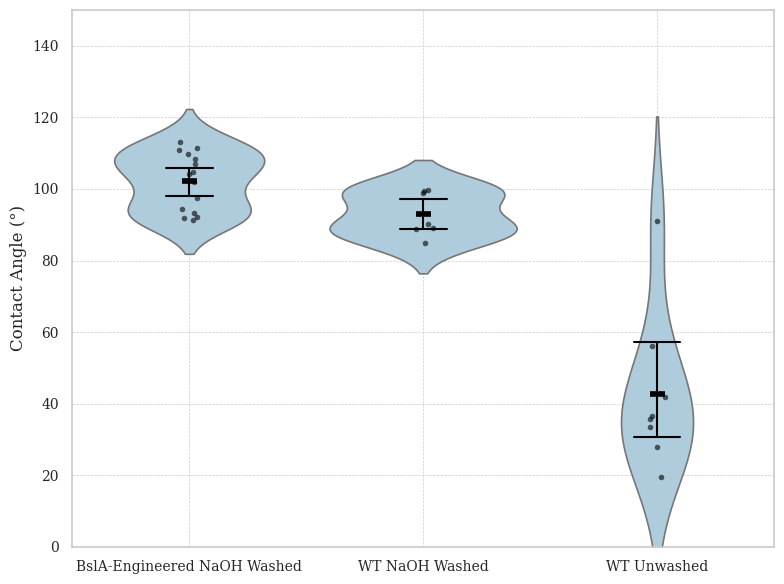

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

plt.rcParams.update({
    'font.size': 12,        
    'font.family': 'serif', 
    'axes.titlesize': 14,  
    'axes.labelsize': 12,  
    'xtick.labelsize': 10,  
    'ytick.labelsize': 10,
    'legend.fontsize': 10 
})

# Define a single light blue color for all violin plots
violin_color = "#A6CEE3"  # A soft, professional light blue

# Violin plot (set all violins to the same color)
sns.violinplot(data=contact_df, x="Experimental_Group", y="Theta_E", 
               inner=None, color=violin_color, linewidth=1.2)

# Add jittered scatterplot of raw data (black points)
sns.stripplot(data=contact_df, x="Experimental_Group", y="Theta_E",
              color="black", jitter=0.05, alpha=0.6, size=4)

# Add mean line (thicker for visibility)
sns.pointplot(data=contact_df, x="Experimental_Group", y="Theta_E", 
              estimator="mean", join=False, capsize=0.2, errwidth=1.5,
              color="black", markers="_", scale=2, linewidth=2.5)  

# Labels and formatting
plt.xlabel("")
plt.ylabel("Contact Angle (°)", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5)
y_max = 150  # Leave room on top for significance markings
plt.ylim(0, y_max)

plt.tight_layout()
plt.savefig("contact_angle.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()


In [8]:
import pandas as pd
from scipy.stats import ttest_ind

# Extract contact angles for control and experimental groups
bsla_angles = contact_df[contact_df["Experimental_Group"] == 'BslA-Engineered NaOH Washed']["Theta_E"]
control_angles = contact_df[contact_df["Experimental_Group"] == 'WT Unwashed']["Theta_E"]
p_value_bsla_vs_control = ttest_ind(control_angles, bsla_angles, equal_var=False).pvalue
print('p_value_bsla_vs_control', p_value_bsla_vs_control)

# Extract contact angles for early (0 & 24hr) and late (96, 168, 240hr) experimental groups
washed_angles = contact_df[contact_df["Experimental_Group"] == 'WT NaOH Washed']["Theta_E"]
p_value_washed_vs_control = ttest_ind(control_angles, washed_angles, equal_var=False).pvalue
print('p_value_washed_vs_control', p_value_washed_vs_control)

p_value_bsla_vs_washed = ttest_ind(washed_angles, bsla_angles, equal_var=False).pvalue
print('p_value_bsla_vs_washed', p_value_bsla_vs_washed)


p_value_bsla_vs_control 8.281175328303156e-05
p_value_washed_vs_control 0.0002484864954698195
p_value_bsla_vs_washed 0.010277202018767863
